# **Python for Data Analytics**
# **Specialization: Programming and EDA with Python**
**Your task is to analyze data with Python and create a notebook, where you can show your Python and analytical skills.**


**The Minimum Requirements for the Graded Task**


**Use Python data types:**

**• a list, a dictionary, an array, a dataframe.**

**• Use Python functions to work with a dataset: join, filter, delete elements, etc.**

**• Use Numpy and Pandas packages.**

**• Use at least one package for visualization: Matplotlib, Seaborn, Plotly.**

**• Use at least 3 different charts in your project.**

# **The goal of this project is to investigate customer satisfaction by analyzing review scores based on several key variables.**

**The variables of interest include:**

• Freight Value

• Price (product price)

• Hours to Approve (the order)

• Days to Deliver (the product)

• Days Estimated vs. Actual (delivery of the product)

• Review Score


**The file is here:**

https://docs.google.com/spreadsheets/d/1MB9MxK1lf4kvBpcmrbSvgdEwyiq9XXVA/edit?usp=drive_link&ouid=113052928631314822714&rtpof=true&sd=true

**This file has one sheet = Sheet1:**

The data in this file has not been cleaned yet. We will work on this as part of the project. We have to find and remove outliers.

#**1. Preparation to connect google colab:**

In [10]:
from google.colab import auth
auth.authenticate_user()

In [11]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [35]:
list(customer_data)

['Order_ID',
 'Product_Category_Name',
 'Seller_State',
 'Customer_State',
 'Geolocation_Zip_Code_Prefix',
 'Freight_Value',
 'Price',
 'Freight_percentage_of_the_price',
 'Shipment_Volume_cbm',
 'Product_Weigt_g',
 'Purchase_Date',
 'Order_Approved_Date',
 'Order_Delivered_Customer_Date',
 'Order_Estimated_Delivery_Date',
 'Hours_to_Approve',
 'Days_to_Deliver',
 'Days_Estimated_vs_Actual',
 'Order_Status',
 'Review_Score']

#**2. We would like to ascertain the number of columns in attached file:**

In [36]:
path_raw_data = '/content/drive/MyDrive/Python files (new)/File for Python Graded task (raw_data).xlsx'
customer_data = pd.read_excel(path_raw_data)

columns = customer_data.columns  # Get the column names

# Print the column names
print("Columns in the 'Sheet1' sheet:")
for column in columns:
    print(column)

Columns in the 'Sheet1' sheet:
Order_ID
Product_Category_Name
Seller_State
Customer_State
Geolocation_Zip_Code_Prefix
Freight_Value
Price
Freight_percentage_of_the_price
Shipment_Volume_cbm
Product_Weigt_g
Purchase_Date
Order_Approved_Date
Order_Delivered_Customer_Date
Order_Estimated_Delivery_Date
Hours_to_Approve
Days_to_Deliver
Days_Estimated_vs_Actual
Order_Status
Review_Score


In [37]:
customer_data.shape

(3218, 19)

In [38]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order_ID                         3218 non-null   object 
 1   Product_Category_Name            3218 non-null   object 
 2   Seller_State                     3218 non-null   object 
 3   Customer_State                   3218 non-null   object 
 4   Geolocation_Zip_Code_Prefix      3218 non-null   int64  
 5   Freight_Value                    3218 non-null   float64
 6   Price                            3218 non-null   float64
 7   Freight_percentage_of_the_price  3218 non-null   float64
 8   Shipment_Volume_cbm              3218 non-null   float64
 9   Product_Weigt_g                  3218 non-null   int64  
 10  Purchase_Date                    3218 non-null   object 
 11  Order_Approved_Date              3218 non-null   object 
 12  Order_Delivered_Cust

#**3. We would like to see the entire table with the data inside (the first 5 rows):**

In [39]:
# By default, head() displays the first 5 rows of the DataFrame.
customer_data.head()

,Order_ID,Product_Category_Name,Seller_State,Customer_State,Geolocation_Zip_Code_Prefix,Freight_Value,Price,Freight_percentage_of_the_price,Shipment_Volume_cbm,Product_Weigt_g,Purchase_Date,Order_Approved_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Order_Status,Review_Score
0,c5bdd8ef3c0ec420232e668302179113,construction_tools_construction,MG,SP,38950,22.30,0.85,2623.53,0.00070,200,2018-04-27 12:37:10 UTC,2018-04-28 02:55:22 UTC,2018-05-05 16:22:05 UTC,2018-05-23 00:00:00 UTC,858,8,17,delivered,1
1,3ee6513ae7ea23bdfab5b9ab60bffcb5,construction_tools_construction,MG,SP,38950,18.23,0.85,2144.71,0.00070,200,2018-04-24 11:01:06 UTC,2018-04-26 03:55:26 UTC,2018-05-07 23:21:11 UTC,2018-05-17 00:00:00 UTC,2454,13,9,delivered,4
2,6e864b3f0ec71031117ad4cf46b7f2a1,construction_tools_construction,MG,RJ,38950,18.23,0.85,2144.71,0.00070,200,2018-04-24 20:15:21 UTC,2018-04-24 20:33:18 UTC,2018-05-04 19:32:53 UTC,2018-05-18 00:00:00 UTC,17,9,13,delivered,5
3,8272b63d03f5f79c56e9e4120aec44ef,health_beauty,SP,SP,3813,7.89,1.20,657.50,0.00126,800,2017-07-16 18:19:25 UTC,2017-07-17 18:25:23 UTC,2017-07-31 18:03:02 UTC,2017-07-28 00:00:00 UTC,1445,14,-3,delivered,1
4,7c92284adbec8033d160303d83065dbf,housewares,SP,RS,7077,18.23,3.06,595.75,0.01500,150,2018-07-17 16:55:18 UTC,2018-07-17 17:05:26 UTC,2018-07-26 18:26:44 UTC,2018-08-08 00:00:00 UTC,10,9,12,delivered,3


In [41]:
customer_data.tail()

,Order_ID,Product_Category_Name,Seller_State,Customer_State,Geolocation_Zip_Code_Prefix,Freight_Value,Price,Freight_percentage_of_the_price,Shipment_Volume_cbm,Product_Weigt_g,Purchase_Date,Order_Approved_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Order_Status,Review_Score
3213,cea6a91496c8046f157f38239f2cf06f,telephony,SP,SP,3504,12.79,12.77,100.16,0.00063,100,2018-04-19 01:01:29 UTC,2018-04-19 01:12:04 UTC,2018-05-04 23:58:41 UTC,2018-05-10 00:00:00 UTC,10,15,5,delivered,4
3214,2e92b6acae58342ffb8861708b8c8270,sports_leisure,SC,PR,89053,14.52,14.50,100.14,0.00300,150,2017-03-26 16:44:07 UTC,2017-03-28 03:43:49 UTC,2017-04-05 10:19:05 UTC,2017-04-18 00:00:00 UTC,2099,9,12,delivered,5
3215,5c455e9a6d56d30c1652aea99d744e5c,computers_accessories,SP,GO,4102,35.03,34.99,100.11,0.00062,150,2018-05-13 11:28:24 UTC,2018-05-13 11:52:30 UTC,2018-05-19 00:17:37 UTC,2018-06-22 00:00:00 UTC,24,5,33,delivered,2
3216,bc3ac768a8963f4ca68942ea6558fc9f,fashion_bags_accessories,RS,SC,90010,30.02,29.99,100.10,0.00410,150,2018-03-21 09:40:36 UTC,2018-03-22 03:09:01 UTC,2018-03-27 20:14:40 UTC,2018-04-10 00:00:00 UTC,1048,6,13,delivered,5
3217,371dcdd114490b436dff8fac7d52a928,industry_commerce_and_business,SP,RS,7074,60.03,60.00,100.05,0.05824,10250,2018-06-27 15:44:06 UTC,2018-06-29 02:53:27 UTC,2018-07-11 17:11:55 UTC,2018-07-30 00:00:00 UTC,2109,14,18,delivered,4


In [42]:
customer_data.sample()

,Order_ID,Product_Category_Name,Seller_State,Customer_State,Geolocation_Zip_Code_Prefix,Freight_Value,Price,Freight_percentage_of_the_price,Shipment_Volume_cbm,Product_Weigt_g,Purchase_Date,Order_Approved_Date,Order_Delivered_Customer_Date,Order_Estimated_Delivery_Date,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Order_Status,Review_Score
2413,a85a0a1d9a45910cbfa184cf26220191,electronics,SP,RJ,1212,15.1,13.65,110.62,0.0028,200,2018-01-11 22:10:13 UTC,2018-01-13 04:55:13 UTC,2018-01-26 20:55:37 UTC,2018-02-09 00:00:00 UTC,1845,14,13,delivered,5


# **4. Based on our goal, we will work with specific variables from the table:**

• Freight Value

• Price (product price)

• Hours to Approve (the order)

• Days to Deliver (the product)

• Days Estimated vs. Actual (delivery of the product)

• Review Score


In [43]:
# Choosing needed variables (columns) and showing 5 first rows:
customer_data_selected_variables = customer_data[['Freight_Value', 'Price', 'Hours_to_Approve', 'Days_to_Deliver', 'Days_Estimated_vs_Actual', 'Review_Score']]

# Save the data without outliers to a new Excel file:
customer_data_selected_variables.to_excel('customer_data_selected_variables.xlsx', index=False)

customer_data_selected_variables.head()

,Freight_Value,Price,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Review_Score
0,22.30,0.85,858,8,17,1
1,18.23,0.85,2454,13,9,4
2,18.23,0.85,17,9,13,5
3,7.89,1.20,1445,14,-3,1
4,18.23,3.06,10,9,12,3


# **5. Another way how to get specific columns using "drop" function:**

In [44]:
# Correction of the table, removing unnecessary columns using "drop":

customer_data_drop = customer_data.drop(columns=['Order_ID', 'Product_Category_Name', 'Seller_State', 'Customer_State', 'Geolocation_Zip_Code_Prefix', 'Freight_percentage_of_the_price', 'Shipment_Volume_cbm', 'Product_Weigt_g', 'Purchase_Date', 'Order_Approved_Date', 'Order_Delivered_Customer_Date', 'Order_Estimated_Delivery_Date', 'Order_Status'])
customer_data_drop.head()

,Freight_Value,Price,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Review_Score
0,22.30,0.85,858,8,17,1
1,18.23,0.85,2454,13,9,4
2,18.23,0.85,17,9,13,5
3,7.89,1.20,1445,14,-3,1
4,18.23,3.06,10,9,12,3


# **6. "Variables" & "Review_Score" relationship:**

**To remove outliers from columns we need to find:**

**• Mean**

**• Standard Deviation**

**• Upper Standard Deviation**

**• Lower Standard Deviation**

**• Maximum Value**

**• Minimum Value**


In [45]:
customer_data_drop.describe()

,Freight_Value,Price,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Review_Score
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,24.989714,18.243496,736.928216,14.550963,12.207893,3.989124
std,21.541946,15.414170,1286.675769,9.444966,11.037843,1.388999
min,7.390000,0.850000,0.000000,1.000000,-109.000000,1.000000
25%,15.100000,11.492500,13.000000,8.000000,7.000000,3.000000
50%,18.230000,13.990000,23.000000,13.000000,13.000000,5.000000
75%,25.630000,19.900000,1178.000000,18.000000,18.000000,5.000000
max,299.160000,189.900000,15993.000000,132.000000,139.000000,5.000000


In [46]:
# Get the basic statistics using describe()
basic_statistics = customer_data_drop.describe()

# Calculate upper and lower standard deviations for each variable
for col in customer_data_drop.columns:
    mean = basic_statistics.loc['mean', col]
    std_dev = basic_statistics.loc['std', col]

    upper_std_dev = mean + 3 * std_dev
    lower_std_dev = mean - 3 * std_dev

    # Add new rows to the describe() output
    basic_statistics.loc['upper_std_dev', col] = upper_std_dev
    basic_statistics.loc['lower_std_dev', col] = lower_std_dev

basic_statistics

,Freight_Value,Price,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Review_Score
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,24.989714,18.243496,736.928216,14.550963,12.207893,3.989124
std,21.541946,15.414170,1286.675769,9.444966,11.037843,1.388999
min,7.390000,0.850000,0.000000,1.000000,-109.000000,1.000000
25%,15.100000,11.492500,13.000000,8.000000,7.000000,3.000000
50%,18.230000,13.990000,23.000000,13.000000,13.000000,5.000000
75%,25.630000,19.900000,1178.000000,18.000000,18.000000,5.000000
max,299.160000,189.900000,15993.000000,132.000000,139.000000,5.000000
upper_std_dev,89.615552,64.486005,4596.955524,42.885861,45.321423,8.156122
lower_std_dev,-39.636123,-27.999013,-3123.099092,-13.783934,-20.905636,-0.177874


# **Removing outliers from columns:**

In [47]:
mean = customer_data_drop.mean()
std = customer_data_drop.std()

# Remove outliers based on a 3 standard deviation threshold:
threshold = 3

customer_data_no_outliers = customer_data_drop[(customer_data_drop >= mean - threshold * std) & (customer_data_drop <= mean + threshold * std)]

# Save the data without outliers to a new Excel file:
customer_data_no_outliers.to_excel('customer_data_no_outliers.xlsx', index=False)

customer_data_no_outliers.head()

,Freight_Value,Price,Hours_to_Approve,Days_to_Deliver,Days_Estimated_vs_Actual,Review_Score
0,22.30,0.85,858.0,8.0,17.0,1
1,18.23,0.85,2454.0,13.0,9.0,4
2,18.23,0.85,17.0,9.0,13.0,5
3,7.89,1.20,1445.0,14.0,-3.0,1
4,18.23,3.06,10.0,9.0,12.0,3


#**Checking the minimum, maximum and mean values after removing outliers**

In [48]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel('customer_data_no_outliers.xlsx')

# Calculate max, min, and mean for each variable
result = pd.DataFrame({
    'Max': df.max(),
    'Min': df.min(),
    'Mean': df.mean()
})
result

,Max,Min,Mean
Freight_Value,88.05,7.39,22.768439
Price,63.00,0.85,16.585926
Hours_to_Approve,4595.00,0.00,621.050143
Days_to_Deliver,42.00,1.00,13.900537
Days_Estimated_vs_Actual,45.00,-20.00,12.467884
Review_Score,5.00,1.00,3.989124


**--> After removing outliers from columns, we got a correct table with minimum and maximum values, which are within a 3 standard deviation range from the mean.**

Correlation Table:
Freight_Value              -0.018938
Price                      -0.021527
Days_to_Deliver            -0.239518
Hours_to_Approve           -0.003945
Days_Estimated_vs_Actual    0.240113
Review_Score                1.000000
Name: Review_Score, dtype: float64


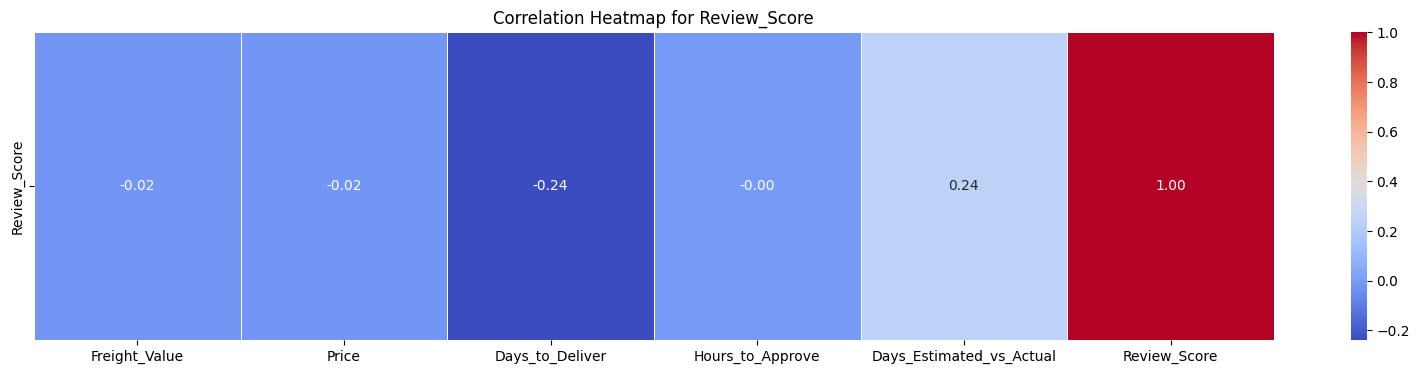

In [49]:
# Load the data from the Excel file
customer_data_no_outliers = 'customer_data_no_outliers.xlsx'
df = pd.read_excel(customer_data_no_outliers)

# Select the relevant columns
selected_columns = ['Freight_Value', 'Price', 'Days_to_Deliver', 'Hours_to_Approve', 'Days_Estimated_vs_Actual', 'Review_Score']
selected_data = df[selected_columns]

# Calculate correlations
correlation_matrix = selected_data.corr()

# Filter the correlation matrix for 'Review_Score' column only
review_score_correlation = correlation_matrix['Review_Score']

# Create a correlation table
print("Correlation Table:")
print(review_score_correlation)

# Create a correlation heatmap for 'Review_Score'
plt.figure(figsize=(20, 4))
sns.heatmap(pd.DataFrame(review_score_correlation).transpose(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Review_Score')
plt.show()

In [51]:
correlation_matrix = selected_data.corr()
correlation_matrix

,Freight_Value,Price,Days_to_Deliver,Hours_to_Approve,Days_Estimated_vs_Actual,Review_Score
Freight_Value,1.000000,0.842217,0.209954,0.016831,0.053520,-0.018938
Price,0.842217,1.000000,0.169312,0.006760,0.043364,-0.021527
Days_to_Deliver,0.209954,0.169312,1.000000,0.066894,-0.549748,-0.239518
Hours_to_Approve,0.016831,0.006760,0.066894,1.000000,-0.055951,-0.003945
Days_Estimated_vs_Actual,0.053520,0.043364,-0.549748,-0.055951,1.000000,0.240113
Review_Score,-0.018938,-0.021527,-0.239518,-0.003945,0.240113,1.000000


#**The Summary of Results**

**The goal of this project is to investigate customer satisfaction by analyzing review scores based on several key variables.**

**The variables of interest include:**

• Freight Value

• Price (product price)

• Hours to Approve (the order)

• Days to Deliver (the product)

• Days Estimated vs. Actual (delivery of the product)

• Review Score


**Here is a description of the correlation level:**

In [39]:
data = [
    ("0.0 - 0.19", "Very low correlation"),
    ("0.2 - 0.39", "Low correlation"),
    ("0.4 - 0.59", "Moderate correlation"),
    ("0.6 - 0.79", "High Correlation"),
    ("0.8 - 1.00", "Very high correlation")]

table = tabulate(data, headers=["Range", "Description"], tablefmt="pretty")
print(table)

+------------+-----------------------+
|   Range    |      Description      |
+------------+-----------------------+
| 0.0 - 0.19 | Very low correlation  |
| 0.2 - 0.39 |    Low correlation    |
| 0.4 - 0.59 | Moderate correlation  |
| 0.6 - 0.79 |   High Correlation    |
| 0.8 - 1.00 | Very high correlation |
+------------+-----------------------+


**Here is a summary of the correlation coefficients we obtained during the project analyzing the relationship between different variables and Review Score:**




In [40]:
data = [
    ("Freight Value", "Review Score", "-0.02", "Very low negative correlation"),
    ("Price", "Review Score", "-0.02", "Very low negative correlation"),
    ("Hours to Approve", "Review Score", "-0.004", "Very low negative correlation"),
    ("Days to Deliver", "Review Score", "-0.24", "Low negative correlation"),
    ("Days Estimated vs. Actual", "Review Score", "+0.24", "Low positive correlation")]

# Specify stralign="left" for the 'Variables' column
table = tabulate(data, headers=["Variables", "Variable", "Correlation Coefficient", "Description"], tablefmt="pretty", stralign="left")
print(table)

+---------------------------+--------------+-------------------------+-------------------------------+
| Variables                 | Variable     | Correlation Coefficient | Description                   |
+---------------------------+--------------+-------------------------+-------------------------------+
| Freight Value             | Review Score | -0.02                   | Very low negative correlation |
| Price                     | Review Score | -0.02                   | Very low negative correlation |
| Hours to Approve          | Review Score | -0.004                  | Very low negative correlation |
| Days to Deliver           | Review Score | -0.24                   | Low negative correlation      |
| Days Estimated vs. Actual | Review Score | +0.24                   | Low positive correlation      |
+---------------------------+--------------+-------------------------+-------------------------------+


**Here is a bar chart representing the results:**

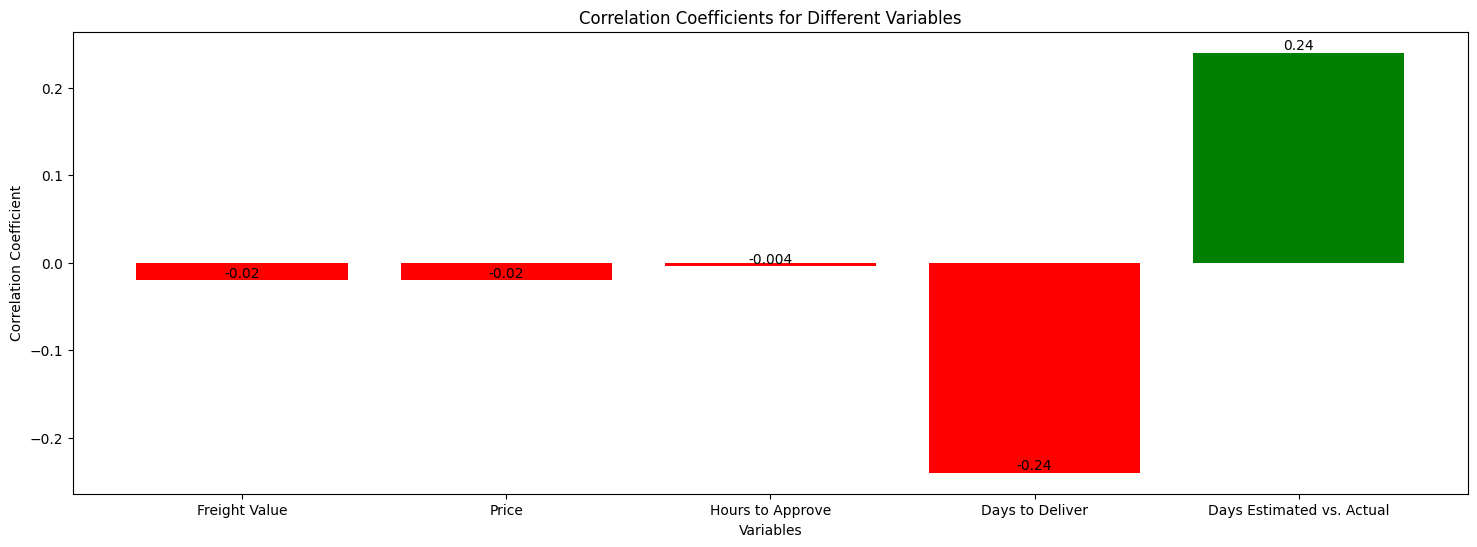

In [42]:
data = [
    ("Freight Value", "Review Score", -0.02, "Very low negative correlation"),
    ("Price", "Review Score", -0.02, "Very low negative correlation"),
    ("Hours to Approve", "Review Score", -0.004, "Very low negative correlation"),
    ("Days to Deliver", "Review Score", -0.24, "Low negative correlation"),
    ("Days Estimated vs. Actual", "Review Score", 0.24, "Low positive correlation")]

variables = [item[0] for item in data]
correlation_coefficients = [item[2] for item in data]

plt.figure(figsize=(18, 6))
bars = plt.bar(variables, correlation_coefficients, color=['red' if coeff < 0 else 'green' for coeff in correlation_coefficients])
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients for Different Variables')
plt.xticks(rotation=0, ha="center")

# Add values above the bars
for bar, value in zip(bars, correlation_coefficients):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.show()


**Insights and facts:**

**1. The color red is used to signify a negative correlation, indicating that as one variable increases, the other decreases.**

**When "Freight Value", "Price", "Hours to Approve", "Days to Deliver" increases, "Review Score" decreases, suggesting lower customer satisfaction.**

**2.The color green represents a positive correlation, where an increase in one variable corresponds to an increase in another.**

**When "Days Estimated vs. Actual" increases, "Review Score" also increases, indicating higher customer satisfaction.**

**3. The results in the table below:**

In [43]:
data = [
    ("Freight Value", "22.76", "-0.02", "Customers satisfaction decreases as this number rises","Customers prefer freight costs for goods to be below the average of $22.76."),
    ("Price", "16.58", "-0.02", "Customers satisfaction decreases as this number rises", "Customers prefer lower prices for goods compared to the average price of $16.58."),
    ("Hours to Approve", "621.05", "-0.004", "Customers satisfaction decreases as this number rises", "Customers prefer to receive approvals in significantly fewer hours than the current average of 621.05 hours for the Hours to Approve metric."),
    ("Days to Deliver", "13.9", "-0.24", "Customers satisfaction decreases as this number rises", "Customers prefer to receive their purchased goods in less than the current average of 13.9 days."),
    ("Days Estimated vs.Actual", "12.46", "+0.24", "Customers satisfaction increases as this number rises", "Customers receive their purchased goods, on average, 12.46 days faster than the estimated delivery time.")]

# Specify stralign="left" for the 'Variables' column
table = tabulate(data, headers=["Variables", "Mean", "Corr. coeff.", "Customer satisfaction", "Insights"], tablefmt="pretty", stralign="left")

print(table)

+--------------------------+--------+--------------+-------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+
| Variables                | Mean   | Corr. coeff. | Customer satisfaction                                 | Insights                                                                                                                                     |
+--------------------------+--------+--------------+-------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------+
| Freight Value            | 22.76  | -0.02        | Customers satisfaction decreases as this number rises | Customers prefer freight costs for goods to be below the average of $22.76.                                                            

**4. The validation results data is included in the attached file:**

https://docs.google.com/spreadsheets/d/12FM-dHVx3RU6ZPRdjM0vRE4uhFh9LmH-/edit?usp=drive_link&ouid=113052928631314822714&rtpof=true&sd=true